In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Selecting Necessary Attributes**

In [ ]:
necessary_columns = ["event_type","category_code","brand","price"]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# path1 = "/content/drive/MyDrive/2019-Oct.csv"
path1 = "/content/drive/MyDrive/2019-Nov.csv"

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load only event_type column to check distribution
# df_full = pd.read_csv(path1, usecols=["event_type"])

# # Calculate proportions of event types
# event_counts = df_full["event_type"].value_counts(normalize=True)
# print("Event Type Distribution in Full Dataset:\n", event_counts)

# # Choose sample size (1% of total data)
# sample_size = int(0.01 * len(df_full))  # Adjust percentage as needed

# # Load full dataset with selected size, maintaining distribution
# df_sampled, _ = train_test_split(df_full, train_size=sample_size, stratify=df_full["event_type"], random_state=42)

# # Verify event type distribution in sampled dataset
# print("\nEvent Type Distribution in Sampled Dataset:\n", df_sampled["event_type"].value_counts(normalize=True))

# # Now, load the full dataset with only the sampled indices
# df1 = pd.read_csv(path1, usecols=necessary_columns, nrows=sample_size)

# df1.to_csv("/content/drive/MyDrive/final_data.csv", index=False)

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/final_data.csv")

In [ ]:
print(df1.shape)

(287956, 4)


In [ ]:
print(df1.columns)

Index(['event_type', 'category_code', 'brand', 'price'], dtype='object')


In [ ]:
print(df1.head())

  event_type              category_code   brand   price
0       view     electronics.smartphone  xiaomi  489.07
1       view  appliances.sewing_machine  janome  293.65
2       view                        NaN   creed   28.31
3       view  appliances.kitchen.washer      lg  712.87
4       view     electronics.smartphone  xiaomi  183.27


### **Some Basic Info**

In [ ]:
# Find the maximum number of levels in category_code
max_levels = df1["category_code"].dropna().apply(lambda x: x.count(".")).max() + 1

print("Maximum hierarchy levels:", max_levels)


Maximum hierarchy levels: 4


In [ ]:
df1[['category_1', 'category_2', 'category_3', 'category_4']] = df1['category_code'].str.split('.', n=3, expand=True)

In [ ]:
df1 = df1.drop(columns=['category_code'])

In [ ]:
df1.head()

,event_type,brand,price,category_1,category_2,category_3,category_4
0,view,xiaomi,489.07,electronics,smartphone,None,None
1,view,janome,293.65,appliances,sewing_machine,None,None
2,view,creed,28.31,NaN,NaN,NaN,NaN
3,view,lg,712.87,appliances,kitchen,washer,None
4,view,xiaomi,183.27,electronics,smartphone,None,None


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287956 entries, 0 to 287955
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   event_type  287956 non-null  object 
 1   brand       244668 non-null  object 
 2   price       287956 non-null  float64
 3   category_1  193189 non-null  object 
 4   category_2  193189 non-null  object 
 5   category_3  77780 non-null   object 
 6   category_4  256 non-null     object 
dtypes: float64(1), object(6)
memory usage: 15.4+ MB
None


In [ ]:
df1.describe(include='all')

,event_type,brand,price,category_1,category_2,category_3,category_4
count,287956,244668,287956.000000,193189,193189,77780,256
unique,3,2077,NaN,13,55,82,1
top,view,samsung,NaN,electronics,smartphone,headphone,piano
freq,278564,35432,NaN,106255,76062,7945,256
mean,NaN,NaN,287.762799,NaN,NaN,NaN,NaN
std,NaN,NaN,346.529635,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,66.900000,NaN,NaN,NaN,NaN
50%,NaN,NaN,167.050000,NaN,NaN,NaN,NaN
75%,NaN,NaN,360.110000,NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(287956, 7)

In [ ]:
print(df1.columns)

Index(['event_type', 'brand', 'price', 'category_1', 'category_2',
       'category_3', 'category_4'],
      dtype='object')


### **EDA [Exploratory Data Analytics]**

In [ ]:
print("Dataset Shape:", df1.shape)
print(df1.head())

print("\nColumn Info:")
print(df1.info())

print("\nStatistical Summary (Numerical Data):")
print(df1.describe())

print("\nUnique Values per Categorical Column:")
for col in ['event_type', 'brand', 'category_1', 'category_2', 'category_3', 'category_4']:
    print(f"{col}: {df1[col].nunique()} unique values")


Dataset Shape: (287956, 7)
  event_type   brand   price   category_1      category_2 category_3  \
0       view  xiaomi  489.07  electronics      smartphone       None   
1       view  janome  293.65   appliances  sewing_machine       None   
2       view   creed   28.31          NaN             NaN        NaN   
3       view      lg  712.87   appliances         kitchen     washer   
4       view  xiaomi  183.27  electronics      smartphone       None   

  category_4  
0       None  
1       None  
2        NaN  
3       None  
4       None  

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287956 entries, 0 to 287955
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   event_type  287956 non-null  object 
 1   brand       244668 non-null  object 
 2   price       287956 non-null  float64
 3   category_1  193189 non-null  object 
 4   category_2  193189 non-null  object 
 5   category_3  77780 non-null 

In [ ]:
# Check missing values percentage
missing_values = df1.isnull().sum() / len(df1) * 100
print("\nMissing Values (%):")
print(missing_values[missing_values > 0])

# Fill missing values
df1.fillna({'brand': 'unknown', 'category_1': 'unknown', 'category_2': 'unknown',
           'category_3': 'unknown', 'category_4': 'unknown'}, inplace=True)



Missing Values (%):
brand         15.032852
category_1    32.910236
category_2    32.910236
category_3    72.988929
category_4    99.911098
dtype: float64


<ipython-input-198-6bf11e3122fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['event_type'], palette='viridis')


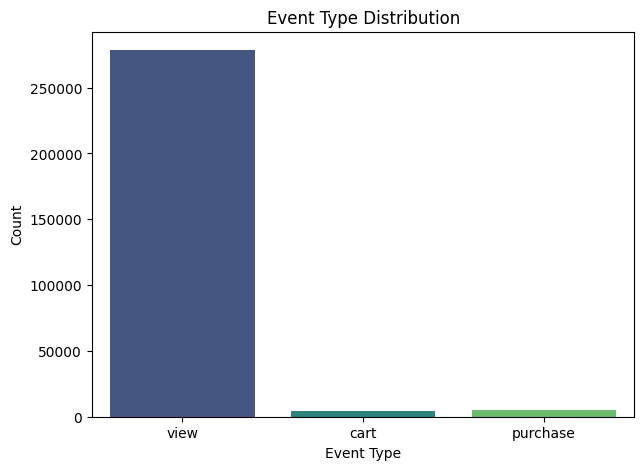

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=df1['event_type'], palette='viridis')
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()


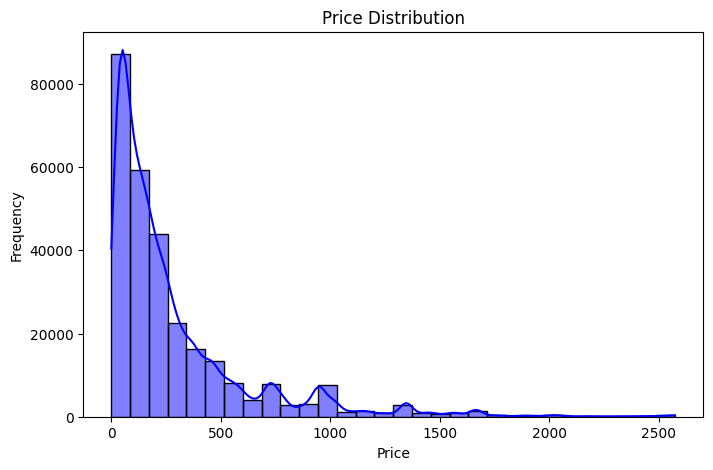

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df1['price'], bins=30, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


<ipython-input-200-79627634d138>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')


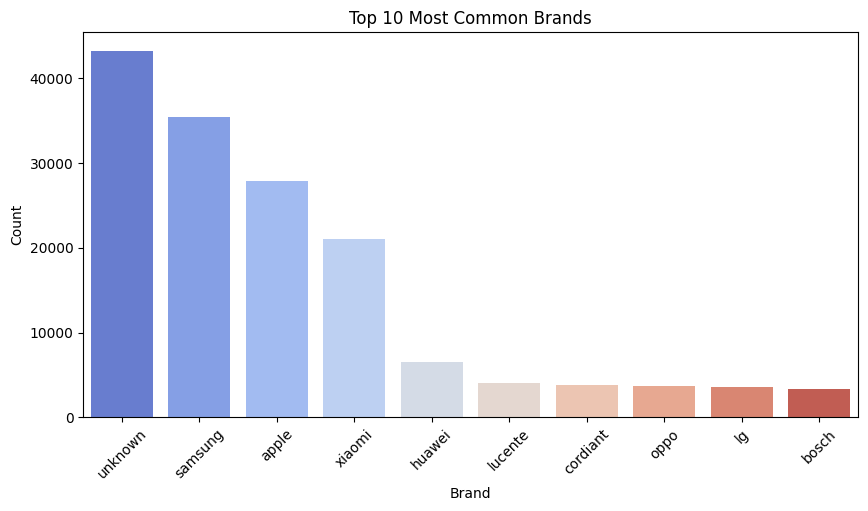

In [ ]:
top_brands = df1['brand'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')
plt.title("Top 10 Most Common Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


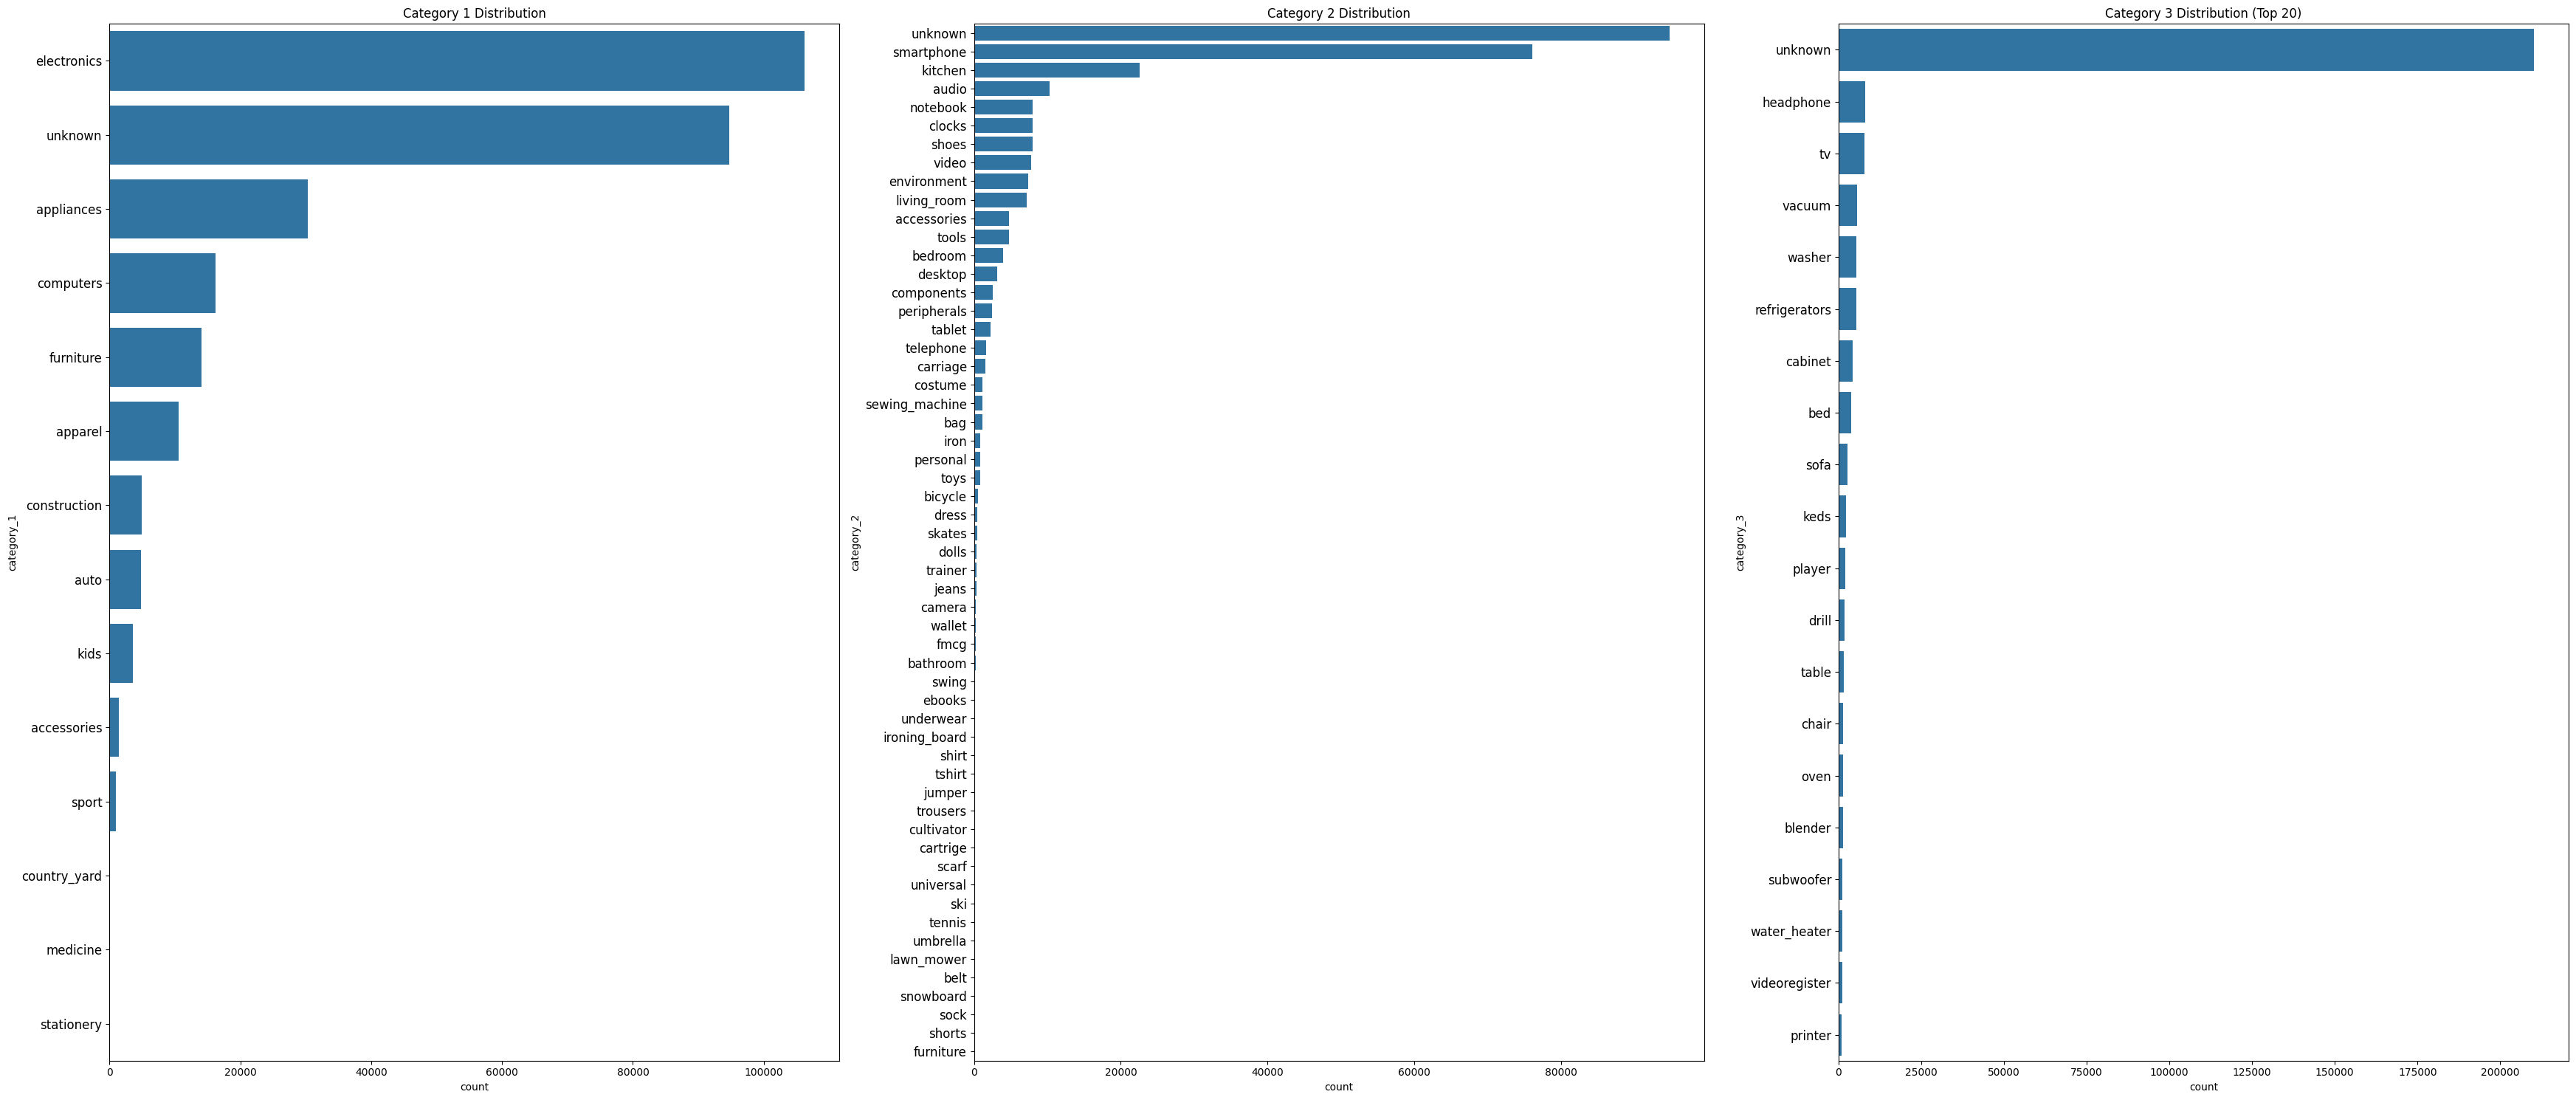

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(35, 15))  # Increase figure size

# Category 1
sns.countplot(y=df1['category_1'], order=df1['category_1'].value_counts().index, ax=axes[0])
axes[0].set_title("Category 1 Distribution")
axes[0].tick_params(axis='y', labelsize=12)  # Increase label size

# Category 2
sns.countplot(y=df1['category_2'], order=df1['category_2'].value_counts().index, ax=axes[1])
axes[1].set_title("Category 2 Distribution")
axes[1].tick_params(axis='y', labelsize=12)

# Category 3 (Limit top 20 for readability)
top_20_categories = df1['category_3'].value_counts().index[:20]
sns.countplot(y=df1[df1['category_3'].isin(top_20_categories)]['category_3'],
              order=top_20_categories, ax=axes[2])
axes[2].set_title("Category 3 Distribution (Top 20)")
axes[2].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()


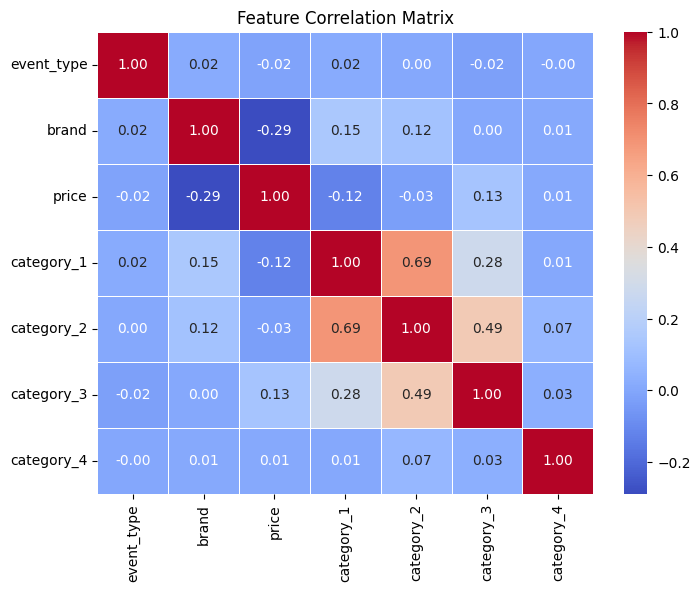

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['event_type', 'brand', 'category_1', 'category_2', 'category_3', 'category_4']:
    df1[col] = encoder.fit_transform(df1[col])

# Compute correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


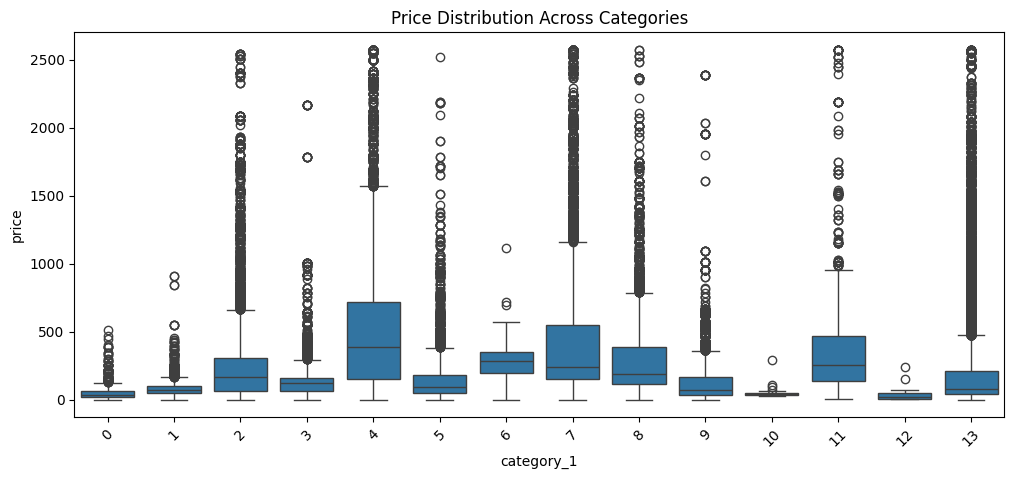

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='category_1', y='price', data=df1)
plt.xticks(rotation=45)
plt.title("Price Distribution Across Categories")
plt.show()

### **Data Preprocessing & Feature Engineering**

In [ ]:
df1_feature_engineered = df1.copy()

In [ ]:
# feature engineering of event_type

event_weights = {'view': 1, 'cart': 2,'review_cart': 3 ,'purchase': 4}
df1_feature_engineered['event_type_encoded'] = df1_feature_engineered['event_type'].map(event_weights)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_category = LabelEncoder()
label_encoder_brand = LabelEncoder()

df1_feature_engineered['category_1_encoded'] = label_encoder_category.fit_transform(df1_feature_engineered['category_1'])
df1_feature_engineered['category_2_encoded'] = label_encoder_category.fit_transform(df1_feature_engineered['category_2'])
df1_feature_engineered['category_3_encoded'] = label_encoder_category.fit_transform(df1_feature_engineered['category_3'])
df1_feature_engineered['category_4_encoded'] = label_encoder_category.fit_transform(df1_feature_engineered['category_4'])
df1_feature_engineered['brand_encoded'] = label_encoder_brand.fit_transform(df1_feature_engineered['brand'])

In [ ]:
df1_feature_engineered.head()

,event_type,brand,price,category_1,category_2,category_3,category_4,event_type_encoded,category_1_encoded,category_2_encoded,category_3_encoded,category_4_encoded,brand_encoded
0,2,2035,489.07,7,38,74,1,NaN,7,38,74,1,2035
1,2,938,293.65,2,32,74,1,NaN,2,32,74,1,938
2,2,434,28.31,13,53,74,1,NaN,13,53,74,1,434
3,2,1091,712.87,2,25,79,1,NaN,2,25,79,1,1091
4,2,2035,183.27,7,38,74,1,NaN,7,38,74,1,2035


### **Normalization**

In [ ]:
df1_normalized = df1_feature_engineered.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize numeric features
df1_normalized['price_normalized'] = scaler.fit_transform(df1_feature_engineered[['price']])
df1_normalized['category_1_normalized'] = scaler.fit_transform(df1_feature_engineered[['category_1_encoded']])
df1_normalized['category_2_normalized'] = scaler.fit_transform(df1_feature_engineered[['category_2_encoded']])
df1_normalized['category_3_normalized'] = scaler.fit_transform(df1_feature_engineered[['category_3_encoded']])
df1_normalized['category_4_normalized'] = scaler.fit_transform(df1_feature_engineered[['category_4_encoded']])
df1_normalized['brand_normalized'] = scaler.fit_transform(df1_feature_engineered[['brand_encoded']])


# Display summary
df1_normalized.head()


,event_type,brand,price,category_1,category_2,category_3,category_4,event_type_encoded,category_1_encoded,category_2_encoded,category_3_encoded,category_4_encoded,brand_encoded,price_normalized,category_1_normalized,category_2_normalized,category_3_normalized,category_4_normalized,brand_normalized
0,view,xiaomi,489.07,electronics,smartphone,unknown,unknown,1,7,38,74,1,2035,0.189999,0.538462,0.690909,0.902439,1.0,0.979779
1,view,janome,293.65,appliances,sewing_machine,unknown,unknown,1,2,32,74,1,938,0.114080,0.153846,0.581818,0.902439,1.0,0.451613
2,view,creed,28.31,unknown,unknown,unknown,unknown,1,13,53,74,1,434,0.010998,1.000000,0.963636,0.902439,1.0,0.208955
3,view,lg,712.87,appliances,kitchen,washer,unknown,1,2,25,79,1,1091,0.276943,0.153846,0.454545,0.963415,1.0,0.525277
4,view,xiaomi,183.27,electronics,smartphone,unknown,unknown,1,7,38,74,1,2035,0.071199,0.538462,0.690909,0.902439,1.0,0.979779


In [ ]:
df1_denormalized = df1_normalized.copy()

In [ ]:
# Decode price, event_type, category_code, and brand similarly
df1_denormalized['price_decoded'] = scaler.inverse_transform(df1_denormalized[['price_normalized']])
df1_denormalized['category_1_decoded'] = scaler.inverse_transform(df1_denormalized[['category_1_normalized']])
df1_denormalized['category_2_decoded'] = scaler.inverse_transform(df1_denormalized[['category_2_normalized']])
df1_denormalized['category_3_decoded'] = scaler.inverse_transform(df1_denormalized[['category_3_normalized']])
df1_denormalized['category_4_decoded'] = scaler.inverse_transform(df1_denormalized[['category_4_normalized']])
df1_denormalized['brand_decoded'] = scaler.inverse_transform(df1_denormalized[['brand_normalized']])


In [ ]:
df1_denormalized.head()

,event_type,brand,price,category_1,category_2,category_3,category_4,event_type_encoded,category_1_encoded,category_2_encoded,...,category_2_normalized,category_3_normalized,brand_normalized,category_4_normalized,price_decoded,category_1_decoded,category_2_decoded,category_3_decoded,category_4_decoded,brand_decoded
0,2,2035,489.07,7,38,74,1,NaN,7,38,...,0.690909,0.902439,0.979779,1.0,394.627337,1118.384615,1435.018182,1874.365854,2077.0,2035.0
1,2,938,293.65,2,32,74,1,NaN,2,32,...,0.581818,0.902439,0.451613,1.0,236.944236,319.538462,1208.436364,1874.365854,2077.0,938.0
2,2,434,28.31,13,53,74,1,NaN,13,53,...,0.963636,0.902439,0.208955,1.0,22.843151,2077.000000,2001.472727,1874.365854,2077.0,434.0
3,2,1091,712.87,2,25,79,1,NaN,2,25,...,0.454545,0.963415,0.525277,1.0,575.210072,319.538462,944.090909,2001.012195,2077.0,1091.0
4,2,2035,183.27,7,38,74,1,NaN,7,38,...,0.690909,0.902439,0.979779,1.0,147.879347,1118.384615,1435.018182,1874.365854,2077.0,2035.0


In [ ]:
df1_normalized.columns

Index(['event_type', 'brand', 'price', 'category_1', 'category_2',
       'category_3', 'category_4', 'event_type_encoded', 'category_1_encoded',
       'category_2_encoded', 'category_3_encoded', 'category_4_encoded',
       'brand_encoded', 'price_normalized', 'category_1_normalized',
       'category_2_normalized', 'category_3_normalized', 'brand_normalized'],
      dtype='object')

In [ ]:
import joblib

joblib.dump(scaler, '/content/drive/MyDrive/Encoded_pickel_files/scaler.pkl')


['/content/drive/MyDrive/Encoded_pickel_files/scaler.pkl']

## **Initial Model Training**

In [ ]:
df_final = df1_normalized.copy()

In [ ]:
X = df1_normalized[['price_normalized', 'category_1_normalized', 'category_2_normalized', 'category_3_normalized', 'brand_normalized']]
y = df1_normalized['event_type']  # Target variable

# linear regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

        cart       0.00      0.00      0.00       794
    purchase       0.00      0.00      0.00      1057
        view       0.97      1.00      0.98     55741

    accuracy                           0.97     57592
   macro avg       0.32      0.33      0.33     57592
weighted avg       0.94      0.97      0.95     57592


Confusion Matrix:
 [[    0     0   794]
 [    0     0  1057]
 [    0     0 55741]]

Accuracy Score:
 0.9678601194610362


Using GPU for training.
Detected 3 unique classes in target variable.
Computed class weights: {0: np.float64(23.17079058539529), 1: np.float64(18.28721124077161), 2: np.float64(0.34457103625292235)}
Epoch 1/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.4453 - loss: 1.0775 - val_accuracy: 0.4471 - val_loss: 1.1280 - learning_rate: 0.0010
Epoch 2/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.5495 - loss: 1.0426 - val_accuracy: 0.6260 - val_loss: 1.0174 - learning_rate: 0.0010
Epoch 3/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.5819 - loss: 1.0438 - val_accuracy: 0.6579 - val_loss: 0.9508 - learning_rate: 0.0010
Epoch 4/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.5872 - loss: 1.0219 - val_accuracy: 0.6109 - val_loss: 1.0150 - learning_rate: 0.0010
Epoch 5/50
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.5878 - loss: 1.0249 - val_accuracy: 0.6340 - val_loss: 0.9955 - learning_rate: 0.0010
Epoch 6/50
3598/3600 ━━━

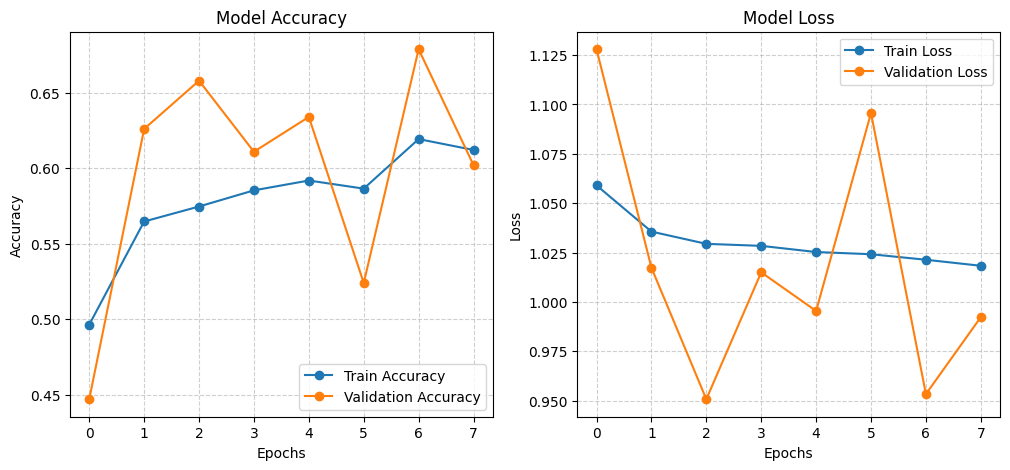

All results saved in: /content/drive/MyDrive/Results


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Concatenate, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Check if GPU is available
device_name = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print(f"Using {device_name} for training.")

# Define device strategy
if device_name == "GPU":
    strategy = tf.distribute.MirroredStrategy()  # Multi-GPU if available
else:
    strategy = tf.distribute.get_strategy()  # Default CPU strategy

# Define save directory
save_dir = "/content/drive/MyDrive/Results"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Ensure target variable is correctly encoded
num_classes = len(np.unique(y))
print(f"Detected {num_classes} unique classes in target variable.")

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights for imbalanced datasets
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"Computed class weights: {class_weight_dict}")

# Use strategy scope for device optimization
with strategy.scope():
    # Neural Network Model
    input_price = Input(shape=(1,), name="price_normalized")
    input_category1 = Input(shape=(1,), name="category_1_normalized")
    input_category2 = Input(shape=(1,), name="category_2_normalized")
    input_category3 = Input(shape=(1,), name="category_3_normalized")
    input_brand = Input(shape=(1,), name="brand_normalized")

    # Concatenate inputs
    merged = Concatenate()([input_price, input_category1, input_category2, input_category3, input_brand])

    # Fully connected layers with optimizations
    dense1 = Dense(128)(merged)
    dense1 = BatchNormalization()(dense1)
    dense1 = LeakyReLU()(dense1)
    dense1 = Dropout(0.3)(dense1)  # Dropout for regularization

    dense2 = Dense(64)(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = LeakyReLU()(dense2)
    dense2 = Dropout(0.3)(dense2)

    dense3 = Dense(32)(dense2)
    dense3 = BatchNormalization()(dense3)
    dense3 = LeakyReLU()(dense3)

    output = Dense(num_classes, activation="softmax")(dense3)  # Output layer

    # Compile model
    model = keras.Model(inputs=[input_price, input_category1, input_category2, input_category3, input_brand], outputs=output)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train model
history = model.fit(
    [X_train["price_normalized"], X_train["category_1_normalized"], X_train["category_2_normalized"],
     X_train["category_3_normalized"], X_train["brand_normalized"]],
    y_train,
    epochs=50,
    batch_size=64,  # Increased batch size for faster training
    validation_data=([X_test["price_normalized"], X_test["category_1_normalized"], X_test["category_2_normalized"],
                      X_test["category_3_normalized"], X_test["brand_normalized"]], y_test),
    class_weight=class_weight_dict,  # Apply class weights
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate model
loss, acc = model.evaluate([X_test["price_normalized"], X_test["category_1_normalized"],
                            X_test["category_2_normalized"], X_test["category_3_normalized"],
                            X_test["brand_normalized"]], y_test)
print(f"Test Accuracy: {acc:.4f}")

# Save the model in the recommended format
model.save(os.path.join(save_dir, "optimized_event_type_prediction_model.keras"))

# Save model weights separately (updated filename format)
model.save_weights(os.path.join(save_dir, "model.weights.h5"))

# Save model architecture
with open(os.path.join(save_dir, "model_architecture.json"), "w") as json_file:
    json.dump(model.to_json(), json_file)

# Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv(os.path.join(save_dir, "training_history.csv"), index=False)


# Save history as JSON
with open(os.path.join(save_dir, "training_history.json"), "w") as json_file:
    json.dump(history.history, json_file)

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig(os.path.join(save_dir, "accuracy_plot.png"), dpi=300)  # Save accuracy graph in high resolution

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig(os.path.join(save_dir, "loss_plot.png"), dpi=300)  # Save loss graph in high resolution

plt.show()

# Save final evaluation metrics
metrics = {"Test Loss": loss, "Test Accuracy": acc}
with open(os.path.join(save_dir, "final_metrics.json"), "w") as json_file:
    json.dump(metrics, json_file, indent=4)

print(f"All results saved in: {save_dir}")


## **Federated Learning**

In [ ]:
pip install flwr

In [ ]:
import flwr as fl
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import json
import os

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Results/optimized_event_type_prediction_model.keras"

# Load the saved model
def load_model():
    return tf.keras.models.load_model(MODEL_PATH)

model = load_model()  # Load once to check
print("✅ Model loaded successfully!")


✅ Model loaded successfully!
